# Gradient Descent Intro
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x):
    return a*x+b

In [3]:
a = 3.
b = 8.

In [4]:
n = 30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([0.2893, 0.6716, 0.9191, 0.9739, 0.148 , 0.2224, 0.5026, 0.456 , 0.6496, 0.6634, 0.2687,
       0.9417, 0.4239, 0.3914, 0.4928, 0.2875, 0.1722, 0.3066, 0.5727, 0.2279, 0.8557, 0.9424,
       0.1746, 0.1867, 0.4497, 0.2579, 0.0479, 0.6487, 0.73  , 0.4276])

In [6]:
y

array([ 8.868 , 10.0147, 10.7574, 10.9217,  8.444 ,  8.6671,  9.5078,  9.3679,  9.9487,  9.9903,
        8.806 , 10.8251,  9.2716,  9.1743,  9.4783,  8.8624,  8.5167,  8.9199,  9.7181,  8.6837,
       10.567 , 10.8272,  8.5237,  8.56  ,  9.349 ,  8.7737,  8.1437,  9.9461, 10.19  ,  9.2827])

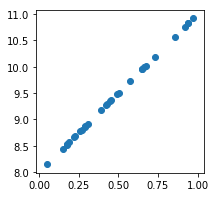

In [7]:
plt.scatter(x,y)

In [10]:
def sse(y, y_pred):
    return ((y-y_pred)**2).sum()

def loss(y, a, b, x):
    return sse(y, lin(a,b,x))

def avg_loss(y, a, b, x):
    return np.sqrt(loss(y, a, b, x) / n)

In [11]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

8.9701

In [12]:
lr = 0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [15]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani